# Analysing the host information including;age, location,gender and status for the possible prediction of outcome of recovery vs Death

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

In [2]:
data = pd.read_csv('data_SARS-CoV-2_TestMetadata_with_viral.csv')

In [3]:
# iterating the columns 
for col in data.columns: 
    print(col) 

record_date
virus_name
accession_id
type
lineage
passage_details_history
collection_date
location
host
additional_location_info
gender
age
status
specimen_source
additional_host_information
outbreak
last_vaccinated
treatment
sequencing_technology
assembly_method
coverage
comment
originating_lab
originating_lab_address
sample_id_given_by_sample_provider
submitting_lab
submitting_lab_address
sample_id_given_by_submitting_lab
authors
submitter
submission_date
submitter_address
Query
Strand
%N
Length(nt)
Length(aa)
#Muts
%Muts
#UniqueMuts
%UniqueMuts
#ExistingMuts
%ExistingMuts
Comment
Symbol
Reference
UniqueMutList
ExistingMutList
Clade
IfExistSpecialChar


# Preprocessing and cleaning the data

In [4]:
#important features
start_data_row = 76
Final_data_row = 255
Data = data.loc[ start_data_row:Final_data_row , ['status','%N','Length(nt)','Length(aa)',
                                                   '%Muts','%UniqueMuts','%ExistingMuts','ExistingMutList','Clade']]
#change the index of the data according to the length of the new data
Data.index = range(len(Data))

In [5]:
#removing the % from the data
Data['%N'] = Data['%N'].str.replace('%', ' ') 
Data['%Muts'] = Data['%Muts'].str.replace('%', ' ') 
Data['%UniqueMuts'] = Data['%UniqueMuts'].str.replace('%', ' ') 
Data['%ExistingMuts'] = Data['%ExistingMuts'].str.replace('%', ' ') 
Data['%N'].astype(float)
Data['%Muts'].astype(float)
Data['%UniqueMuts'].astype(float)
Data['%ExistingMuts'].astype(float)

0      0.04
1      0.05
2      0.13
3      0.03
4      0.03
       ... 
173    0.04
174    0.05
175    0.05
176    0.05
177    0.01
Name: %ExistingMuts, Length: 178, dtype: float64

In [6]:
#getting rid of NaN data
Data.dropna(subset = ['status'], inplace=True)
Data.dropna(subset = ['ExistingMutList'], inplace=True)
Data.index = range(len(Data))

In [7]:
#chacking if there is any null data in ExistingMutList
for i in range(len(Data)):
    if pd.isnull(Data.ExistingMutList[i]) is True:
        print('True')

In [8]:
#getting rid of NaN data
Data.drop(Data.loc[Data['status']=='unknown'].index, inplace=True)

In [9]:
#Labeling
Data.replace(['Deceased'],value= [1], inplace=True)
Data.status[Data['status'] != 1]=0

C:\Users\Azadeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
#using dummies instead of location data for ML input
Data_model = pd.concat([pd.get_dummies(Data[['ExistingMutList']]),pd.get_dummies(Data[['Clade']]), Data[['status','%N','Length(nt)','Length(aa)',
                                                   '%Muts','%UniqueMuts']]], axis=1)
Data_model.head()

,"ExistingMutList_(NS3_A23V,NS3_G251V)",ExistingMutList_(NS3_G251V),ExistingMutList_(NS8_L84S),ExistingMutList_(NSP12_P323L),"ExistingMutList_(NSP12_P323L,NS8_L84S)","ExistingMutList_(NSP12_P323L,NSP12_A185V,Spike_D614G)","ExistingMutList_(NSP12_P323L,NSP12_A449V,Spike_D614G,N_G204R,N_R203K)","ExistingMutList_(NSP12_P323L,NSP12_T252N,Spike_D614G)","ExistingMutList_(NSP12_P323L,NSP12_T26I,Spike_D614G,M_D3G)","ExistingMutList_(NSP12_P323L,NSP12_V880I,Spike_D614G,Spike_E583D,NS3_Q57H,N_S194L)",...,Clade_G,Clade_Other,Clade_S,Clade_V,status,%N,Length(nt),Length(aa),%Muts,%UniqueMuts
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.00,29890.0,9710.0,0.04,0.00
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.00,29849.0,9710.0,0.05,0.00
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,2.41,29899.0,9685.0,0.19,0.05
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.00,29845.0,9710.0,0.04,0.01
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.00,29834.0,9710.0,0.03,0.00


In [11]:
#checking the balance in the data
Data_model['status'].value_counts()

0    137
1     32
Name: status, dtype: int64

In [16]:
#Separating target (label) data
X = Data_model.drop('status',axis=1).astype(float)
y = Data_model.status
y=y.astype(int)
y.value_counts()


0    137
1     32
Name: status, dtype: int64

### Kernel PCA diemnsion reduction

#### from sklearn.decomposition import PCA, KernelPCA
kpca = KernelPCA(kernel="rbf")
kpca.fit(X_train)
#X_back = kpca.inverse_transform(X_kpca)
X_train = kpca.transform(X_train)
X_test = kpca.transform(X_test)

### Scaling the data

In [17]:
# Scaling the data to standarize them
#Here caling reduced the iteration number from 200 to 50
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
sc = StandardScaler()
#sc = MinMaxScaler()
sc.fit(X)
X_scaled = sc.transform(X)
X_normal_scaled = X_scaled[y == 0] 
X_deseased_scaled = X_scaled[y == 1] 

## Simple feedforward autoencoder

In [18]:
import keras
from keras.optimizers import Adam
from keras.models import Sequential, Model
from keras.layers import Input, Dense

window_length = 115
encoding_dim = 3
epochs = 300
test_samples = 2000

X_simple = X.values.reshape((len(X), np.prod(X.shape[1:])))

# this is our input placeholder
input_window = Input(shape=(window_length,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_window)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(window_length, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_window, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_window, encoded)


autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(X_normal_scaled, X_normal_scaled,
                epochs=epochs,
                batch_size=1024,
                shuffle=True,
                validation_split = 0.20)

# Separating the points encoded by the Auto-encoder as normal and fraud 
decoded_X_normal = autoencoder.predict(X_normal_scaled)
decoded_X_deseased = autoencoder.predict(X_deseased_scaled)
# Combining the encoded points into a single table  
encoded_X = np.append(decoded_X_normal, decoded_X_deseased, axis = 0) 
y_normal = np.zeros(decoded_X_normal.shape[0]) 
y_deceased = np.ones(decoded_X_deseased.shape[0]) 
encoded_y = np.append(y_normal, y_deceased) 


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 115)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 348       
_________________________________________________________________
dense_4 (Dense)              (None, 115)               460       
Total params: 808
Trainable params: 808
Non-trainable params: 0
_________________________________________________________________
Train on 109 samples, validate on 28 samples
Epoch 1/300
109/109 [==============================] - 0s 3ms/step - loss: 0.6988 - val_loss: 0.6852
Epoch 2/300
109/109 [==============================] - 0s 46us/step - loss: 0.6972 - val_loss: 0.6837
Epoch 3/300
109/109 [==============================] - 0s 51us/step - loss: 0.6957 - val_loss: 0.6824
Epoch 4/300
109/109 [====================

Epoch 74/300
109/109 [==============================] - 0s 55us/step - loss: 0.5700 - val_loss: 0.5856
Epoch 75/300
109/109 [==============================] - 0s 55us/step - loss: 0.5677 - val_loss: 0.5843
Epoch 76/300
109/109 [==============================] - 0s 33us/step - loss: 0.5653 - val_loss: 0.5829
Epoch 77/300
109/109 [==============================] - 0s 55us/step - loss: 0.5629 - val_loss: 0.5816
Epoch 78/300
109/109 [==============================] - 0s 28us/step - loss: 0.5606 - val_loss: 0.5802
Epoch 79/300
109/109 [==============================] - 0s 41us/step - loss: 0.5581 - val_loss: 0.5789
Epoch 80/300
109/109 [==============================] - 0s 39us/step - loss: 0.5557 - val_loss: 0.5776
Epoch 81/300
109/109 [==============================] - 0s 28us/step - loss: 0.5533 - val_loss: 0.5762
Epoch 82/300
109/109 [==============================] - 0s 45us/step - loss: 0.5508 - val_loss: 0.5749
Epoch 83/300
109/109 [==============================] - 0s 27us/step - lo

Epoch 154/300
109/109 [==============================] - 0s 37us/step - loss: 0.3590 - val_loss: 0.4883
Epoch 155/300
109/109 [==============================] - 0s 27us/step - loss: 0.3564 - val_loss: 0.4874
Epoch 156/300
109/109 [==============================] - 0s 46us/step - loss: 0.3538 - val_loss: 0.4864
Epoch 157/300
109/109 [==============================] - 0s 27us/step - loss: 0.3512 - val_loss: 0.4854
Epoch 158/300
109/109 [==============================] - 0s 28us/step - loss: 0.3486 - val_loss: 0.4845
Epoch 159/300
109/109 [==============================] - 0s 27us/step - loss: 0.3460 - val_loss: 0.4835
Epoch 160/300
109/109 [==============================] - 0s 27us/step - loss: 0.3434 - val_loss: 0.4826
Epoch 161/300
109/109 [==============================] - 0s 46us/step - loss: 0.3409 - val_loss: 0.4817
Epoch 162/300
109/109 [==============================] - 0s 42us/step - loss: 0.3383 - val_loss: 0.4807
Epoch 163/300
109/109 [==============================] - 0s 46us

Epoch 233/300
109/109 [==============================] - 0s 38us/step - loss: 0.1744 - val_loss: 0.4230
Epoch 234/300
109/109 [==============================] - 0s 37us/step - loss: 0.1723 - val_loss: 0.4224
Epoch 235/300
109/109 [==============================] - 0s 37us/step - loss: 0.1703 - val_loss: 0.4217
Epoch 236/300
109/109 [==============================] - 0s 37us/step - loss: 0.1682 - val_loss: 0.4210
Epoch 237/300
109/109 [==============================] - 0s 37us/step - loss: 0.1661 - val_loss: 0.4204
Epoch 238/300
109/109 [==============================] - 0s 42us/step - loss: 0.1641 - val_loss: 0.4197
Epoch 239/300
109/109 [==============================] - 0s 37us/step - loss: 0.1620 - val_loss: 0.4190
Epoch 240/300
109/109 [==============================] - 0s 36us/step - loss: 0.1599 - val_loss: 0.4184
Epoch 241/300
109/109 [==============================] - 0s 28us/step - loss: 0.1579 - val_loss: 0.4177
Epoch 242/300
109/109 [==============================] - 0s 45us

# Deep autoencoder NN

In [405]:
import keras
from keras.optimizers import Adam
from keras.models import Sequential, Model
from keras.layers import Input, Dense
from keras import regularizers 
# Building the Input Layer 
input_layer = Input(shape =(X.shape[1], )) 
  
# Building the Encoder network 
encoded = Dense(100, activation ='tanh', 
                activity_regularizer = regularizers.l1(10e-5))(input_layer) 
encoded = Dense(50, activation ='tanh', 
                activity_regularizer = regularizers.l1(10e-5))(encoded) 
encoded = Dense(25, activation ='tanh', 
                activity_regularizer = regularizers.l1(10e-5))(encoded) 
encoded = Dense(12, activation ='tanh', 
                activity_regularizer = regularizers.l1(10e-5))(encoded) 
encoded = Dense(6, activation ='relu')(encoded) 
  
# Building the Decoder network 
decoded = Dense(12, activation ='tanh')(encoded) 
decoded = Dense(25, activation ='tanh')(decoded) 
decoded = Dense(50, activation ='tanh')(decoded) 
decoded = Dense(100, activation ='tanh')(decoded) 
  
# Building the Output Layer 
output_layer = Dense(X.shape[1], activation ='relu')(decoded) 
#Step 8: Defining and Training the Auto-encoder
# Defining the parameters of the Auto-encoder network 
autoencoder = Model(input_layer, output_layer) 
autoencoder.compile(optimizer ="adadelta", loss ="mse") 
# Training the Auto-encoder network 
autoencoder.fit(X_normal_scaled, X_normal_scaled,  
                batch_size = 16, epochs = 10,  
                shuffle = True, validation_split = 0.20) 

hidden_representation = Sequential() 
hidden_representation.add(autoencoder.layers[0]) 
hidden_representation.add(autoencoder.layers[1]) 
hidden_representation.add(autoencoder.layers[2]) 
hidden_representation.add(autoencoder.layers[3]) 
hidden_representation.add(autoencoder.layers[4]) 

# Separating the points encoded by the Auto-encoder as normal and fraud 
decoded_X_normal = hidden_representation.predict(X_normal_scaled)
decoded_X_deseased = hidden_representation.predict(X_deseased_scaled)
# Combining the encoded points into a single table  
encoded_X = np.append(decoded_X_normal, decoded_X_deseased, axis = 0) 
y_normal = np.zeros(decoded_X_normal.shape[0]) 
y_deceased = np.ones(decoded_X_deseased.shape[0]) 
encoded_y = np.append(y_normal, y_deceased) 

Train on 109 samples, validate on 28 samples
Epoch 1/10
109/109 [==============================] - 2s 19ms/step - loss: 0.3033 - val_loss: 0.1544
Epoch 2/10
109/109 [==============================] - 0s 367us/step - loss: 0.0453 - val_loss: 0.2149
Epoch 3/10
109/109 [==============================] - 0s 329us/step - loss: -0.0887 - val_loss: 0.1867
Epoch 4/10
109/109 [==============================] - 0s 399us/step - loss: -0.1546 - val_loss: 0.2093
Epoch 5/10
109/109 [==============================] - 0s 375us/step - loss: -0.2069 - val_loss: 0.1905
Epoch 6/10
109/109 [==============================] - 0s 366us/step - loss: -0.2405 - val_loss: 0.1677
Epoch 7/10
109/109 [==============================] - 0s 366us/step - loss: -0.2682 - val_loss: 0.1273
Epoch 8/10
109/109 [==============================] - 0s 384us/step - loss: -0.2582 - val_loss: 0.1511
Epoch 9/10
109/109 [==============================] - 0s 398us/step - loss: -0.2897 - val_loss: 0.1462
Epoch 10/10
109/109 [==========

# Second deep autoencoder NN

In [532]:
from keras.layers import Input, Dense, BatchNormalization
from keras.models import Model
from keras import regularizers
import datetime
import numpy as np
import matplotlib.pyplot as plt
# Building the Encoder network 
input_window = Input(shape=(window_length,))
x = Dense(6, activation='relu')(input_window)
x = BatchNormalization()(x)
encoded = Dense(encoding_dim, activation='relu')(x)
# "decoded" is the lossy reconstruction of the input
x = Dense(6, activation='relu')(encoded)
x = BatchNormalization()(x)
decoded = Dense(window_length, activation='sigmoid')(x)
# this model maps an input to its reconstruction
autoencoder = Model(input_window, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_window, encoded)
autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_normal_scaled, X_normal_scaled,
                epochs=epochs,
                batch_size=16,
                shuffle=True,
                validation_split = 0.20)
# Separating the points encoded by the Auto-encoder as normal and fraud 
decoded_X_normal = autoencoder.predict(X_normal_scaled)
decoded_X_deseased = autoencoder.predict(X_deseased_scaled)
# Combining the encoded points into a single table  
encoded_X = np.append(decoded_X_normal, decoded_X_deseased, axis = 0) 
y_normal = np.zeros(decoded_X_normal.shape[0]) 
y_deceased = np.ones(decoded_X_deseased.shape[0]) 
encoded_y = np.append(y_normal, y_deceased) 

Model: "model_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        (None, 115)               0         
_________________________________________________________________
dense_136 (Dense)            (None, 6)                 696       
_________________________________________________________________
batch_normalization_11 (Batc (None, 6)                 24        
_________________________________________________________________
dense_137 (Dense)            (None, 3)                 21        
_________________________________________________________________
dense_138 (Dense)            (None, 6)                 24        
_________________________________________________________________
batch_normalization_12 (Batc (None, 6)                 24        
_________________________________________________________________
dense_139 (Dense)            (None, 115)               805

109/109 [==============================] - 0s 295us/step - loss: 0.1040 - val_loss: 0.2629
Epoch 68/300
109/109 [==============================] - 0s 284us/step - loss: 0.0969 - val_loss: 0.2584
Epoch 69/300
109/109 [==============================] - 0s 301us/step - loss: 0.0912 - val_loss: 0.2548
Epoch 70/300
109/109 [==============================] - 0s 288us/step - loss: 0.0809 - val_loss: 0.2513
Epoch 71/300
109/109 [==============================] - 0s 283us/step - loss: 0.0766 - val_loss: 0.2485
Epoch 72/300
109/109 [==============================] - 0s 356us/step - loss: 0.0682 - val_loss: 0.2451
Epoch 73/300
109/109 [==============================] - 0s 269us/step - loss: 0.0628 - val_loss: 0.2415
Epoch 74/300
109/109 [==============================] - 0s 284us/step - loss: 0.0599 - val_loss: 0.2395
Epoch 75/300
109/109 [==============================] - 0s 293us/step - loss: 0.0508 - val_loss: 0.2372
Epoch 76/300
109/109 [==============================] - 0s 370us/step - loss:

109/109 [==============================] - 0s 329us/step - loss: -0.2950 - val_loss: 0.2424
Epoch 145/300
109/109 [==============================] - 0s 316us/step - loss: -0.3142 - val_loss: 0.2431
Epoch 146/300
109/109 [==============================] - 0s 336us/step - loss: -0.3204 - val_loss: 0.2450
Epoch 147/300
109/109 [==============================] - 0s 328us/step - loss: -0.3264 - val_loss: 0.2477
Epoch 148/300
109/109 [==============================] - 0s 302us/step - loss: -0.3283 - val_loss: 0.2493
Epoch 149/300
109/109 [==============================] - 0s 326us/step - loss: -0.3386 - val_loss: 0.2512
Epoch 150/300
109/109 [==============================] - 0s 320us/step - loss: -0.3404 - val_loss: 0.2536
Epoch 151/300
109/109 [==============================] - 0s 293us/step - loss: -0.3576 - val_loss: 0.2568
Epoch 152/300
109/109 [==============================] - 0s 257us/step - loss: -0.3517 - val_loss: 0.2577
Epoch 153/300
109/109 [==============================] - 0s 

109/109 [==============================] - 0s 292us/step - loss: -0.7714 - val_loss: 0.3868
Epoch 222/300
109/109 [==============================] - 0s 305us/step - loss: -0.7665 - val_loss: 0.3919
Epoch 223/300
109/109 [==============================] - 0s 339us/step - loss: -0.7685 - val_loss: 0.3942
Epoch 224/300
109/109 [==============================] - 0s 357us/step - loss: -0.7658 - val_loss: 0.3892
Epoch 225/300
109/109 [==============================] - 0s 295us/step - loss: -0.7849 - val_loss: 0.3950
Epoch 226/300
109/109 [==============================] - 0s 302us/step - loss: -0.7671 - val_loss: 0.3932
Epoch 227/300
109/109 [==============================] - 0s 298us/step - loss: -0.7799 - val_loss: 0.3930
Epoch 228/300
109/109 [==============================] - 0s 308us/step - loss: -0.7753 - val_loss: 0.3949
Epoch 229/300
109/109 [==============================] - 0s 329us/step - loss: -0.7910 - val_loss: 0.3893
Epoch 230/300
109/109 [==============================] - 0s 

109/109 [==============================] - 0s 303us/step - loss: -0.9685 - val_loss: 0.2716
Epoch 299/300
109/109 [==============================] - 0s 317us/step - loss: -0.9589 - val_loss: 0.2792
Epoch 300/300
109/109 [==============================] - 0s 366us/step - loss: -0.9707 - val_loss: 0.2773


In [19]:
#splitting features and the label: 20% test data and 80% assigned to training data
# split into train/test sets with same class ratio
from sklearn.model_selection import KFold, cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded_X, encoded_y, test_size=0.2, random_state=5, stratify=y)

### Balancing the data

In [20]:
#balancing the data
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# define oversampling strategy
over = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_train, y_train = over.fit_resample(X_train, y_train)
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_train, y_train = under.fit_resample(X_train, y_train)


C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed

# Logistic regression model

In [21]:
#fitting the model and get the conversion probabilities. 
#predit_proba() function of our model assigns probability for each row:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', penalty='l2',C= 1, max_iter=200, n_jobs=1, tol=0.0001)
model.fit(X_train,y_train)
y_hat = model.predict(X_test)
lr_probs = model.predict_proba(X_test)
#Return the mean accuracy on the given test data and taraining data to see if we have overfitting.score clculates R^2
print('R^2 _train=',model.score(X_train, y_train))
print('R^2 _test=',model.score(X_test, y_test))

R^2 _train= 0.7990654205607477
R^2 _test= 0.6764705882352942


### Cross validation 

In [22]:
#Cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)
scores = pd.Series(scores)
print('CV-scores_min = ',scores.min())
print('CV_scores_mean =', scores.mean())
print('CV_scores_max =', scores.max())

Cross-Validation Accuracy Scores [0.72727273 0.81818182 0.86363636 0.81818182 0.80952381 0.85714286
 0.71428571 0.76190476 0.80952381 0.85714286]
CV-scores_min =  0.7142857142857143
CV_scores_mean = 0.8036796536796537
CV_scores_max = 0.8636363636363636


In [23]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat})
df.head(25)

,Actual,Predicted
0,0.0,1.0
1,0.0,0.0
2,0.0,0.0
3,0.0,1.0
4,0.0,0.0
5,0.0,0.0
6,1.0,1.0
7,0.0,0.0
8,0.0,0.0
9,1.0,1.0


### Performance measurement metrics

In [24]:
import sklearn.metrics as metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hat))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))

Mean Absolute Error: 0.3235294117647059
Mean Squared Error: 0.3235294117647059
Root Mean Squared Error: 0.568796458994521


In [25]:
from sklearn.metrics import precision_recall_curve
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_hat)

In [26]:
from sklearn.metrics import f1_score
# calculate F1 score
f1 = f1_score(y_test, y_hat)
print('f1 score =', f1)

f1 score = 0.4210526315789474


In [27]:
#Area Under ROC Curve (AUROC) metric
from sklearn.metrics import roc_auc_score
lr_probs = model.predict_proba(X_test)
# Keep only the positive class
#lr_probs = [p[1] for p in lr_probs]
lr_probs
print( 'roc_auc =', roc_auc_score(y_test, lr_probs[:,1]) )

roc_auc = 0.85


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.850


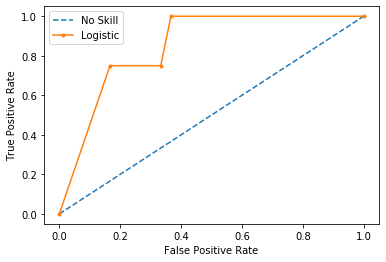

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Logistic: f1=0.421 auc=0.578


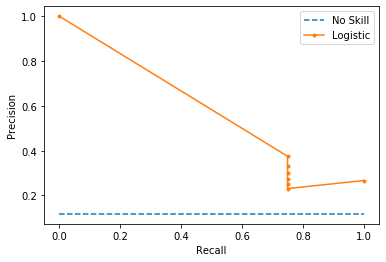

In [29]:
from sklearn.metrics import auc
lr_probs = model.predict_proba(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs[:,1])
lr_f1, lr_auc = f1_score(y_test, y_hat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()